In [180]:
import networkx as nx
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
import copy
import heapq

In [2]:
df = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/test.csv', sep =';')
nameTable = pd.read_csv('C:/Projects IT/Python/Projet Metaheuristic/indexStation.csv', sep =';')

df

,Station,Connection,Time,Name
0,0,1,10,A
1,1,3,10,B
2,1,2,10,B
3,2,7,10,C
4,2,6,10,C
5,2,4,10,C
6,2,1,10,C
7,3,9,10,D
8,3,4,10,D
9,3,1,10,D


In [3]:
MG = nx.MultiGraph()

In [4]:
for i in range(0, len(df.Station)):
    MG.add_edge(df.Station[i], df.Connection[i], weight=df.Time[i])

In [5]:
MG

In [6]:
print(MG.adj)

{0: {1: {0: {'weight': 10}}}, 1: {0: {0: {'weight': 10}}, 3: {0: {'weight': 10}, 1: {'weight': 10}}, 2: {0: {'weight': 10}, 1: {'weight': 10}}}, 3: {1: {0: {'weight': 10}, 1: {'weight': 10}}, 9: {0: {'weight': 10}, 1: {'weight': 10}}, 4: {0: {'weight': 10}, 1: {'weight': 10}}}, 2: {1: {0: {'weight': 10}, 1: {'weight': 10}}, 7: {0: {'weight': 10}, 1: {'weight': 10}}, 6: {0: {'weight': 10}, 1: {'weight': 10}}, 4: {0: {'weight': 10}, 1: {'weight': 10}}}, 7: {2: {0: {'weight': 10}, 1: {'weight': 10}}, 8: {0: {'weight': 10}, 1: {'weight': 10}}}, 6: {2: {0: {'weight': 10}, 1: {'weight': 10}}}, 4: {2: {0: {'weight': 10}, 1: {'weight': 10}}, 3: {0: {'weight': 10}, 1: {'weight': 10}}, 5: {0: {'weight': 10}, 1: {'weight': 10}}}, 9: {3: {0: {'weight': 10}, 1: {'weight': 10}}}, 5: {4: {0: {'weight': 10}, 1: {'weight': 10}}}, 8: {7: {0: {'weight': 10}, 1: {'weight': 10}}}}


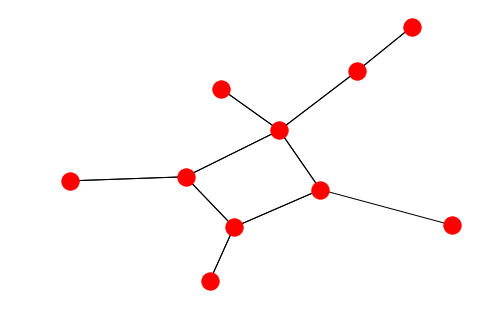

In [7]:
nx.draw(MG, label=True)
plt.show()

In [8]:
shortestMulti = nx.johnson(MG)
print(shortestMulti)
print(shortestMulti[1][5])
print(shortestMulti[1][5][1])

{0: {0: [0], 1: [0, 1], 3: [0, 1, 3], 2: [0, 1, 2], 9: [0, 1, 3, 9], 4: [0, 1, 3, 4], 7: [0, 1, 2, 7], 6: [0, 1, 2, 6], 5: [0, 1, 3, 4, 5], 8: [0, 1, 2, 7, 8]}, 1: {1: [1], 0: [1, 0], 3: [1, 3], 2: [1, 2], 9: [1, 3, 9], 4: [1, 3, 4], 7: [1, 2, 7], 6: [1, 2, 6], 5: [1, 3, 4, 5], 8: [1, 2, 7, 8]}, 3: {3: [3], 1: [3, 1], 9: [3, 9], 4: [3, 4], 0: [3, 1, 0], 2: [3, 1, 2], 5: [3, 4, 5], 7: [3, 1, 2, 7], 6: [3, 1, 2, 6], 8: [3, 1, 2, 7, 8]}, 2: {2: [2], 1: [2, 1], 7: [2, 7], 6: [2, 6], 4: [2, 4], 0: [2, 1, 0], 3: [2, 1, 3], 8: [2, 7, 8], 5: [2, 4, 5], 9: [2, 1, 3, 9]}, 7: {7: [7], 2: [7, 2], 8: [7, 8], 1: [7, 2, 1], 6: [7, 2, 6], 4: [7, 2, 4], 0: [7, 2, 1, 0], 3: [7, 2, 1, 3], 5: [7, 2, 4, 5], 9: [7, 2, 1, 3, 9]}, 6: {6: [6], 2: [6, 2], 1: [6, 2, 1], 7: [6, 2, 7], 4: [6, 2, 4], 0: [6, 2, 1, 0], 3: [6, 2, 1, 3], 8: [6, 2, 7, 8], 5: [6, 2, 4, 5], 9: [6, 2, 1, 3, 9]}, 4: {4: [4], 2: [4, 2], 3: [4, 3], 5: [4, 5], 1: [4, 2, 1], 7: [4, 2, 7], 6: [4, 2, 6], 9: [4, 3, 9], 0: [4, 2, 1, 0], 8: [4, 2, 7

In [166]:
class Chromosome:
    def __init__(self, nodes):
        self.nodes = nodes       
    
    def shuffleGenes(self):
        random.shuffle(self.nodes)   
    
    #Order Changing Mutation, 1 gene is selected thanks to Pm probability then swapped with the other node(cant duplicate)
    def mutationGene(self, Pm):
        self.Pm = Pm
        print(Pm)
        for i in range(0, len(self.nodes)):
            print(i)
            self.randMutate = random.random()
            print("rand = ", self.randMutate)
            print("node = ",i)
            if self.randMutate < self.Pm:
                self.mutateTo = random.randint(0,len(self.nodes)-1)
                print("mutate to", self.mutateTo)
                self.tmpGene = copy.copy(self.nodes[i])
                print("node being changed : ",self.nodes[i])
                self.nodes = np.where(self.nodes == self.mutateTo, self.tmpGene, self.nodes)
                self.nodes[i] = self.mutateTo
                print(self.nodes)

    def pathWay(self, Multigraph): #Multigraph come from the Johnson Networkx calculation for shortest path between 2 nodes
        self.Multigraph = Multigraph
        self.totalPath = []
        for i in range(0, len(self.nodes)-1):        
            if i+1 is not None:
                self.totalPath = merge(self.totalPath, self.Multigraph[self.nodes[i]][self.nodes[i+1]])   
        return self.totalPath
        
    def __repr__(self):
        self.strNodes = "Chromosome :"
        for i in self.nodes:
            self.node = str(i)
            self.strNodes = self.strNodes + "|" + self.node
        self.strNodes = self.strNodes + "|"
        return self.strNodes

In [220]:
#Crossover PErmutation Encoding (1)ABC DEF + (2)DAB CFE --> ABC(1) DFE (in the order of the 2d chromosome genes)
def crossoverPermutation(chromo1, chromo2):
    lenChromo = int(len(chromo1.nodes) / 2)
    childrenChr = chromo1.nodes[0:lenChromo]
    for i in chromo2.nodes:
        if i not in childrenChr:
            childrenChr = np.append(childrenChr, [i])
    return childrenChr
    

In [105]:
def populationGeneration(popsize, nodeList):
    population = []
    for i in range(0,popsize,1):
        nodeList = np.unique(nodeList, axis=0)
        random.shuffle(nodeList)
        population = population + [Chromosome(nodeList)]
    return population

In [12]:
#function can merge 2 list where last element of one(a) is the first element of the second(b)
#for example [1,2,3,4] + [4,5,6] = [1,2,3,4,5,6]
def merge(a, b):
    c = a[:-1] + b[:]
    return c
    

In [167]:
def fitnessScore(uniqueNodeList, chromosome, MultiG):
    fitScore = len(uniqueNodeList.unique()) / len(chromosome.pathWay(MultiG))
    return fitScore

In [169]:
population = populationGeneration(3, df.Station)
population

[Chromosome :|5|2|8|1|0|9|4|3|7|6|,
 Chromosome :|2|3|5|7|6|9|4|8|1|0|,
 Chromosome :|6|1|5|2|9|0|3|4|8|7|]

In [170]:
population[1].pathWay(shortestMulti)

[2, 1, 3, 4, 5, 4, 2, 7, 2, 6, 2, 1, 3, 9, 3, 4, 2, 7, 8, 7, 2, 1, 0]

In [171]:
fitnessScore(df.Station, population[1], shortestMulti)

0.43478260869565216

In [107]:
population[1].mutationGene(0.5)

0.5
0
rand =  0.6134563002869728
node =  0
1
rand =  0.002570461238781019
node =  1
mutate to 9
node being changed :  0
[6 9 0 4 2 8 3 5 1 7]
2
rand =  0.5086703436016567
node =  2
3
rand =  0.798341360103353
node =  3
4
rand =  0.49531385568021613
node =  4
mutate to 2
node being changed :  2
[6 9 0 4 2 8 3 5 1 7]
5
rand =  0.4792497685816637
node =  5
mutate to 3
node being changed :  8
[6 9 0 4 2 3 8 5 1 7]
6
rand =  0.6358437206645996
node =  6
7
rand =  0.6938489542873851
node =  7
8
rand =  0.051395922914695746
node =  8
mutate to 2
node being changed :  1
[6 9 0 4 1 3 8 5 2 7]
9
rand =  0.5613147559616106
node =  9


In [248]:
Chromosome(crossoverPermutation(population[1], population[2]))

Chromosome :|6|7|8|4|2|9|3|0|1|5|

In [289]:
#MAIN LOOP
population = populationGeneration(10, df.Station)
for z in range(0,100):
    fitList = np.array([])
    for i in range(0,len(population)):
        fitList = np.append(fitList, fitnessScore(df.Station, population[i], shortestMulti))
    IndexfitBest = heapq.nlargest(5, range(len(fitList)), fitList.take)
    print(IndexfitBest)
    print(fitList)
    population_best = np.take(population, IndexfitBest)
    print("pop best =",population_best)
    print("lengtg best opo", len(population_best))
    child = [Chromosome(crossoverPermutation(population_best[0], population_best[1]))]
    for u in range(1, len(population_best)):
        print(u)
        child = child + [Chromosome(crossoverPermutation(population_best[u-1], population_best[u]))]
    population = np.append(child, population_best)    
    population[0].mutationGene(0.2)
    print('child =', child)
    print('pop =', population)

print(fitList)
print(population)
print(population_best)

        
        
        
    
  

[4, 0, 6, 3, 9]
[0.52631579 0.4        0.45454545 0.5        0.55555556 0.41666667
 0.52631579 0.4        0.41666667 0.5       ]
pop best = [Chromosome :|5|0|1|9|3|4|6|8|2|7| Chromosome :|8|4|3|2|7|6|5|9|1|0|
 Chromosome :|9|0|8|7|1|2|4|5|3|6| Chromosome :|8|7|3|5|6|4|2|0|9|1|
 Chromosome :|5|1|8|7|4|2|6|3|0|9|]
lengtg best opo 5
1
2
3
4
0.2
0
rand =  0.042423199369377995
node =  0
mutate to 4
node being changed :  5
[4 0 1 9 3 8 5 2 7 6]
1
rand =  0.15326961642940995
node =  1
mutate to 7
node being changed :  0
[4 7 1 9 3 8 5 2 0 6]
2
rand =  0.8783897878580278
node =  2
3
rand =  0.7528362770946185
node =  3
4
rand =  0.8851126462510155
node =  4
5
rand =  0.9444978776280084
node =  5
6
rand =  0.7121671652177386
node =  6
7
rand =  0.6423336750454297
node =  7
8
rand =  0.07152356296761309
node =  8
mutate to 7
node being changed :  0
[4 0 1 9 3 8 5 2 7 6]
9
rand =  0.3922398426492104
node =  9
child = [Chromosome :|4|0|1|9|3|8|5|2|7|6|, Chromosome :|5|0|1|9|3|8|4|2|7|6|, Chromosom

rand =  0.6000751540533302
node =  3
4
rand =  0.7379261170693175
node =  4
5
rand =  0.5995550199910146
node =  5
6
rand =  0.11181733326896759
node =  6
mutate to 0
node being changed :  8
[6 8 1 9 3 5 0 7 4 2]
7
rand =  0.39555598097755806
node =  7
8
rand =  0.06140520371742575
node =  8
mutate to 6
node being changed :  4
[4 8 1 9 3 5 0 7 6 2]
9
rand =  0.01996584654099942
node =  9
mutate to 3
node being changed :  2
[4 8 1 9 2 5 0 7 6 3]
child = [Chromosome :|4|8|1|9|2|5|0|7|6|3|, Chromosome :|6|0|1|9|3|5|8|7|4|2|, Chromosome :|6|0|1|9|3|5|8|7|4|2|, Chromosome :|6|0|1|9|3|5|8|7|4|2|, Chromosome :|6|0|1|9|3|5|8|7|4|2|]
pop = [Chromosome :|4|8|1|9|2|5|0|7|6|3| Chromosome :|6|0|1|9|3|5|8|7|4|2|
 Chromosome :|6|0|1|9|3|5|8|7|4|2| Chromosome :|6|0|1|9|3|5|8|7|4|2|
 Chromosome :|6|0|1|9|3|5|8|7|4|2| Chromosome :|6|0|1|9|3|5|4|8|2|7|
 Chromosome :|6|0|1|9|3|5|8|7|4|2| Chromosome :|6|0|1|9|3|5|8|7|4|2|
 Chromosome :|6|0|1|9|3|5|8|7|4|2| Chromosome :|6|0|1|9|3|5|8|7|4|2|]
[5, 1, 2, 3, 4]

4
rand =  0.5073256986989405
node =  4
5
rand =  0.27045550009409003
node =  5
6
rand =  0.8786891661738818
node =  6
7
rand =  0.7461129886806511
node =  7
8
rand =  0.565404333526052
node =  8
9
rand =  0.39284522024745927
node =  9
child = [Chromosome :|6|0|1|2|3|5|4|8|9|7|, Chromosome :|6|0|1|9|3|5|4|8|2|7|, Chromosome :|6|0|1|9|3|4|8|7|5|2|, Chromosome :|6|0|1|9|3|5|8|7|4|2|, Chromosome :|6|0|1|9|3|5|8|7|4|2|]
pop = [Chromosome :|6|0|1|2|3|5|4|8|9|7| Chromosome :|6|0|1|9|3|5|4|8|2|7|
 Chromosome :|6|0|1|9|3|4|8|7|5|2| Chromosome :|6|0|1|9|3|5|8|7|4|2|
 Chromosome :|6|0|1|9|3|5|8|7|4|2| Chromosome :|6|0|1|9|3|4|8|7|2|5|
 Chromosome :|6|0|1|9|3|5|4|8|2|7| Chromosome :|6|0|1|9|3|4|8|7|5|2|
 Chromosome :|6|0|1|9|3|5|8|7|4|2| Chromosome :|6|0|1|9|3|5|8|7|4|2|]
[5, 1, 6, 2, 3]
[0.43478261 0.58823529 0.55555556 0.55555556 0.55555556 0.625
 0.58823529 0.55555556 0.55555556 0.55555556]
pop best = [Chromosome :|6|0|1|9|3|4|8|7|2|5| Chromosome :|6|0|1|9|3|5|4|8|2|7|
 Chromosome :|6|0|1|9|3|5

 Chromosome :|6|0|1|3|9|5|4|7|2|8|]
lengtg best opo 5
1
2
3
4
0.2
0
rand =  0.028597772050241388
node =  0
mutate to 5
node being changed :  6
[5 0 1 3 9 6 4 7 2 8]
1
rand =  0.3648597804471473
node =  1
2
rand =  0.18845200413739027
node =  2
mutate to 3
node being changed :  1
[5 0 3 1 9 6 4 7 2 8]
3
rand =  0.6048113666781444
node =  3
4
rand =  0.2266673123624029
node =  4
5
rand =  0.2420654755463001
node =  5
6
rand =  0.3473617940238143
node =  6
7
rand =  0.1770295075954481
node =  7
mutate to 3
node being changed :  7
[5 0 7 1 9 6 4 3 2 8]
8
rand =  0.26571845845416064
node =  8
9
rand =  0.17172791495577167
node =  9
mutate to 7
node being changed :  8
[5 0 8 1 9 6 4 3 2 7]
child = [Chromosome :|5|0|8|1|9|6|4|3|2|7|, Chromosome :|6|0|1|3|9|5|4|7|2|8|, Chromosome :|6|0|1|3|9|4|8|7|2|5|, Chromosome :|6|0|1|3|9|4|8|7|2|5|, Chromosome :|6|0|1|3|9|5|4|7|2|8|]
pop = [Chromosome :|5|0|8|1|9|6|4|3|2|7| Chromosome :|6|0|1|3|9|5|4|7|2|8|
 Chromosome :|6|0|1|3|9|4|8|7|2|5| Chromosome :|

node =  2
3
rand =  0.06001125060074641
node =  3
mutate to 0
node being changed :  3
[6 1 3 0 9 4 8 7 2 5]
4
rand =  0.41292191008507595
node =  4
5
rand =  0.6116829336403934
node =  5
6
rand =  0.8321995338703969
node =  6
7
rand =  0.9239518577183483
node =  7
8
rand =  0.4060177065492442
node =  8
9
rand =  0.861171137812359
node =  9
child = [Chromosome :|6|1|3|0|9|4|8|7|2|5|, Chromosome :|6|1|0|3|9|4|8|7|2|5|, Chromosome :|6|1|0|3|9|4|8|7|2|5|, Chromosome :|6|0|1|3|9|4|8|7|2|5|, Chromosome :|6|0|1|3|9|4|8|7|2|5|]
pop = [Chromosome :|6|1|3|0|9|4|8|7|2|5| Chromosome :|6|1|0|3|9|4|8|7|2|5|
 Chromosome :|6|1|0|3|9|4|8|7|2|5| Chromosome :|6|0|1|3|9|4|8|7|2|5|
 Chromosome :|6|0|1|3|9|4|8|7|2|5| Chromosome :|6|1|0|3|9|4|8|7|2|5|
 Chromosome :|6|1|0|3|9|4|8|7|2|5| Chromosome :|6|0|1|3|9|4|8|7|2|5|
 Chromosome :|6|0|1|3|9|4|8|7|2|5| Chromosome :|6|0|1|3|9|4|8|7|2|5|]
[1, 2, 3, 4, 5]
[0.55555556 0.625      0.625      0.625      0.625      0.625
 0.625      0.625      0.625      0.625     

[2 4 8 3 9 6 1 0 5 7]
9
rand =  0.477366377793632
node =  9
child = [Chromosome :|2|4|8|3|9|6|1|0|5|7|, Chromosome :|2|4|5|3|9|6|1|0|8|7|, Chromosome :|6|4|5|3|9|1|0|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|]
pop = [Chromosome :|2|4|8|3|9|6|1|0|5|7| Chromosome :|2|4|5|3|9|6|1|0|8|7|
 Chromosome :|6|4|5|3|9|1|0|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|2|4|5|3|9|1|0|6|7|8|
 Chromosome :|6|4|5|3|9|1|0|8|7|2| Chromosome :|6|1|0|3|9|4|8|7|2|5|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|6|4|5|3|9|1|0|8|7|2|]
[5, 2, 3, 4, 6]
[0.41666667 0.55555556 0.625      0.625      0.625      0.66666667
 0.625      0.625      0.625      0.625     ]
pop best = [Chromosome :|2|4|5|3|9|1|0|6|7|8| Chromosome :|6|4|5|3|9|1|0|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|4|5|3|9|1|0|8|7|2|]
lengtg best opo 5
1
2
3
4
0.2
0
rand =  0.6505238617224305
node =  0
1
rand =  0.331222917

lengtg best opo 5
1
2
3
4
0.2
0
rand =  0.7126195178070543
node =  0
1
rand =  0.5319357647731533
node =  1
2
rand =  0.016351168764167756
node =  2
mutate to 7
node being changed :  5
[2 4 7 3 9 6 1 0 8 5]
3
rand =  0.28754866810983837
node =  3
4
rand =  0.20422892094868939
node =  4
5
rand =  0.2842500348112439
node =  5
6
rand =  0.7650124552413541
node =  6
7
rand =  0.582294721668003
node =  7
8
rand =  0.7515275434802545
node =  8
9
rand =  0.018415374988902555
node =  9
mutate to 0
node being changed :  5
[2 4 7 3 9 6 1 5 8 0]
child = [Chromosome :|2|4|7|3|9|6|1|5|8|0|, Chromosome :|2|4|5|3|9|6|1|0|8|7|, Chromosome :|6|4|5|3|9|1|0|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|]
pop = [Chromosome :|2|4|7|3|9|6|1|5|8|0| Chromosome :|2|4|5|3|9|6|1|0|8|7|
 Chromosome :|6|4|5|3|9|1|0|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|2|4|5|3|9|1|0|6|7|8|
 Chromosome :|6|4|5|3|9|1|0|8|7|2| Chromosome :|6|1|0|3|9|4|5|

node =  8
9
rand =  0.5359163601518084
node =  9
child = [Chromosome :|2|4|5|3|9|6|1|8|0|7|, Chromosome :|2|4|5|3|9|6|1|0|8|7|, Chromosome :|6|4|5|3|9|1|0|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|]
pop = [Chromosome :|2|4|5|3|9|6|1|8|0|7| Chromosome :|2|4|5|3|9|6|1|0|8|7|
 Chromosome :|6|4|5|3|9|1|0|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|2|4|5|3|9|1|0|6|7|8|
 Chromosome :|6|4|5|3|9|1|0|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|6|4|5|3|9|1|0|8|7|2|]
[5, 2, 3, 4, 6]
[0.45454545 0.55555556 0.625      0.625      0.625      0.66666667
 0.625      0.625      0.625      0.625     ]
pop best = [Chromosome :|2|4|5|3|9|1|0|6|7|8| Chromosome :|6|4|5|3|9|1|0|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|4|5|3|9|1|0|8|7|2|]
lengtg best opo 5
1
2
3
4
0.2
0
rand =  0.8484983943495269
node =  0
1
rand =  0.12447491535437616
no

[5, 2, 3, 4, 6]
[0.38461538 0.55555556 0.625      0.625      0.625      0.66666667
 0.625      0.625      0.625      0.625     ]
pop best = [Chromosome :|2|4|5|3|9|1|0|6|7|8| Chromosome :|6|4|5|3|9|1|0|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|
 Chromosome :|6|4|5|3|9|1|0|8|7|2|]
lengtg best opo 5
1
2
3
4
0.2
0
rand =  0.447226415828074
node =  0
1
rand =  0.7925263869820156
node =  1
2
rand =  0.9439080793559073
node =  2
3
rand =  0.7655951323749214
node =  3
4
rand =  0.2527351419063357
node =  4
5
rand =  0.17788224899473004
node =  5
mutate to 3
node being changed :  6
[2 4 5 6 9 3 1 0 8 7]
6
rand =  0.48485874087299885
node =  6
7
rand =  0.7414295670179711
node =  7
8
rand =  0.7801614533299407
node =  8
9
rand =  0.907033173144032
node =  9
child = [Chromosome :|2|4|5|6|9|3|1|0|8|7|, Chromosome :|2|4|5|3|9|6|1|0|8|7|, Chromosome :|6|4|5|3|9|1|0|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|]
pop = [Chromosome :|2|4|

1
2
3
4
0.2
0
rand =  0.6433440723300092
node =  0
1
rand =  0.05469024218629548
node =  1
mutate to 6
node being changed :  4
[2 6 5 3 9 4 1 0 8 7]
2
rand =  0.7443761116180397
node =  2
3
rand =  0.9476218888680983
node =  3
4
rand =  0.9721105616044556
node =  4
5
rand =  0.5229190928892877
node =  5
6
rand =  0.2796498788071473
node =  6
7
rand =  0.32456538238039523
node =  7
8
rand =  0.7870278584798346
node =  8
9
rand =  0.7995905675346401
node =  9
child = [Chromosome :|2|6|5|3|9|4|1|0|8|7|, Chromosome :|2|4|5|3|9|6|1|0|8|7|, Chromosome :|5|4|9|3|2|6|1|0|8|7|, Chromosome :|6|4|5|3|9|1|0|8|7|2|, Chromosome :|6|1|0|3|9|4|5|8|7|2|]
pop = [Chromosome :|2|6|5|3|9|4|1|0|8|7| Chromosome :|2|4|5|3|9|6|1|0|8|7|
 Chromosome :|5|4|9|3|2|6|1|0|8|7| Chromosome :|6|4|5|3|9|1|0|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|2|4|5|3|9|1|0|6|7|8|
 Chromosome :|5|4|9|3|2|6|1|0|8|7| Chromosome :|6|4|5|3|9|1|0|8|7|2|
 Chromosome :|6|1|0|3|9|4|5|8|7|2| Chromosome :|6|1|0|3|9|4|5|8|7|2|]
[5

In [182]:
fff = np.array([1, 3, 2, 4, 5])
heapq.nlargest(3, range(len(fff)), fff.take)

[4, 3, 1]

In [237]:
a = np.array([1,2,3, 7])
a = np.append(a, 3)
a

array([1, 2, 3, 7, 3])

In [251]:
for i in range(0, len(a)):
    print(i)

0
1
2
3
4


In [252]:
a[4]

3

In [259]:
print(len(population_best))

5
